# Mid-semester assignment Part 1 - Basics of deep learning

---
<br>

### Name and ID:
Student 1: Tal Levy
<br>
Student 2: Omer Virshuvski

## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

time: 784 µs (started: 2025-01-21 10:27:10 +00:00)


## Dwonload Dataset

In [20]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 10.8 s (started: 2025-01-21 10:27:11 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [21]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 56.6 ms (started: 2025-01-21 10:27:21 +00:00)


## Data preprocessing (10%)

### Feature scaling

In [22]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)
print(y1.shape)

(784, 5000)
(1, 5000)
time: 17.5 ms (started: 2025-01-21 10:27:22 +00:00)


### Select two classes

In [23]:
selected_classes = ['3','1']
mask = np.isin(y, selected_classes)

X_selected = X[mask]
y_selected = y[mask]

y_selected = np.where(y_selected == '1', 1, np.where(y_selected == '3', 0, y_selected))
labels = y_selected.shape[0]
y_selected.reshape(1,labels)

print(f'Shape of X_selected: {X_selected.shape}')
print(f'Shape of y_selected: {y_selected.shape}')





Shape of X_selected: (1000, 784)
Shape of y_selected: (1000,)
time: 10.1 ms (started: 2025-01-21 10:27:22 +00:00)


### Split the data into Train set and Test set

In [24]:
from sklearn.utils import shuffle

labels = y_selected.shape[0]

X = np.array
Y = np.array

X, Y = shuffle(X_selected, y_selected)
split_index = int(0.8 * X.shape[0])

X_train, X_test = X[:split_index], X[split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

train_labels = Y_train.shape[0]
test_labels = Y_test.shape[0]

X_train,X_test, Y_train, Y_test = X_train.T/255 , X_test.T/255 , Y_train.reshape(train_labels,1), Y_test.reshape(test_labels,1)

print(f'Shape of X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'Shape of X_test: {X_test.shape}, Y_test: {Y_test.shape}')


Shape of X_train: (784, 800), Y_train: (800, 1)
Shape of X_test: (784, 200), Y_test: (200, 1)
time: 7.1 ms (started: 2025-01-21 10:27:22 +00:00)


### Test yourself

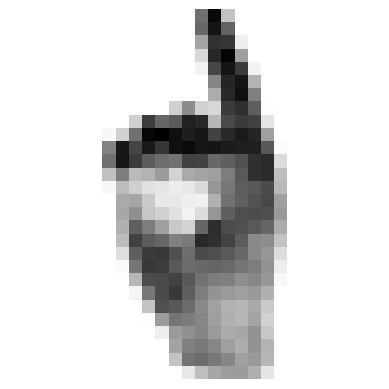

Label: 1, number 98
time: 75.5 ms (started: 2025-01-21 10:27:22 +00:00)


In [25]:
%matplotlib inline
from numpy import random

i = random.randint(100)
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[i,0]
print(f'Label: {Y_train[i,0]}, number {i}')

## Activation functions (10%)

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

time: 560 µs (started: 2025-01-21 10:27:22 +00:00)


## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


In [27]:
def log_loss(y_hat, y):
    epsilon = 1e-15
    y_hat = np.asarray(y_hat, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)

    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

    loss = - (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    return np.mean(loss)


time: 794 µs (started: 2025-01-21 10:27:22 +00:00)


## NN Hyper Parameters

In [28]:
input_layer = X_train.shape[0]
hidden_layer = 128
learning_rate = 0.1
epochs = 20

time: 570 µs (started: 2025-01-21 10:27:22 +00:00)


## Weight and Bias Initialization

In [29]:
W1 = np.random.randn(hidden_layer, input_layer)
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(hidden_layer, hidden_layer)
b2 = np.zeros((hidden_layer, 1))
W3 = np.random.randn(hidden_layer, hidden_layer)
b3 = np.zeros((hidden_layer, 1))
W4 = np.random.randn(1, hidden_layer)
b4 = np.zeros((1, 1))


print(f'W1: {W1.shape}')
print(f'b1: {b1.shape}')
print(f'W2: {W2.shape}')
print(f'b2: {b2.shape}')
print(f'W3: {W3.shape}')
print(f'b3: {b3.shape}')
print(f'W4: {W4.shape}')
print(f'b4: {b4.shape}')

W1: (128, 784)
b1: (128, 1)
W2: (128, 128)
b2: (128, 1)
W3: (128, 128)
b3: (128, 1)
W4: (1, 128)
b4: (1, 1)
time: 19 ms (started: 2025-01-21 10:27:22 +00:00)


## Training (30%)

In [30]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X.shape[1]

for i in range(epochs):
    avg_epoch_loss = 0
    for j in range(num_of_examples):

        Z1 = np.matmul(W1, X[:, j]).reshape(hidden_layer, 1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2, A1) + b2
        A2 = sigmoid(Z2)
        Z3 = np.matmul(W3, A2) + b3
        A3 = sigmoid(Z3)
        Z4 = np.matmul(W4, A3) + b4
        A4 = sigmoid(Z4)

        Yout = Y[j, 0]
        Yout = np.asarray(Yout, dtype=np.float64)


        loss = log_loss(A4, Yout)
        avg_epoch_loss += loss


        dZ4 = A4 - Yout
        dW4 = (1 / num_of_examples) * np.matmul(dZ4, A3.T)
        db4 = dZ4

        dZ3 = np.matmul(W4.T, dZ4) * A3 * (1 - A3)
        dW3 = (1 / num_of_examples) * np.matmul(dZ3, A2.T)
        db3 = dZ3

        dZ2 = np.matmul(W3.T, dZ3) * A2 * (1 - A2)
        dW2 = (1 / num_of_examples) * np.matmul(dZ2, A1.T)
        db2 = dZ2

        dZ1 = np.matmul(W2.T, dZ2) * A1 * (1 - A1)
        dW1 = (1 / num_of_examples) * np.matmul(dZ1, X[:, j].reshape(784, 1).T)
        db1 = dZ1


        W4 -= learning_rate * dW4
        b4 -= learning_rate * db4
        W3 -= learning_rate * dW3
        b3 -= learning_rate * db3
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    avg_epoch_loss /= num_of_examples
    loss_list.append(avg_epoch_loss)
    epoch_list.append(i)
    print(f"Epoch {i}, Loss: {avg_epoch_loss}")


Epoch 0, Loss: 0.857669862562089
Epoch 1, Loss: 0.43727746706318854
Epoch 2, Loss: 0.31659333563705216
Epoch 3, Loss: 0.2559696370233056
Epoch 4, Loss: 0.21733372850913926
Epoch 5, Loss: 0.18948771889121843
Epoch 6, Loss: 0.16813513805950983
Epoch 7, Loss: 0.15117652108685953
Epoch 8, Loss: 0.1373527093395267
Epoch 9, Loss: 0.12584016351158842
Epoch 10, Loss: 0.1160916067885504
Epoch 11, Loss: 0.10773700825490445
Epoch 12, Loss: 0.10051563782527914
Epoch 13, Loss: 0.09423237535841984
Epoch 14, Loss: 0.08873278681723949
Epoch 15, Loss: 0.08389059835033741
Epoch 16, Loss: 0.07960151630107584
Epoch 17, Loss: 0.07577950862293298
Epoch 18, Loss: 0.07235387288731883
Epoch 19, Loss: 0.06926661921106153
time: 47.9 s (started: 2025-01-21 10:27:22 +00:00)


### Loss Visualization

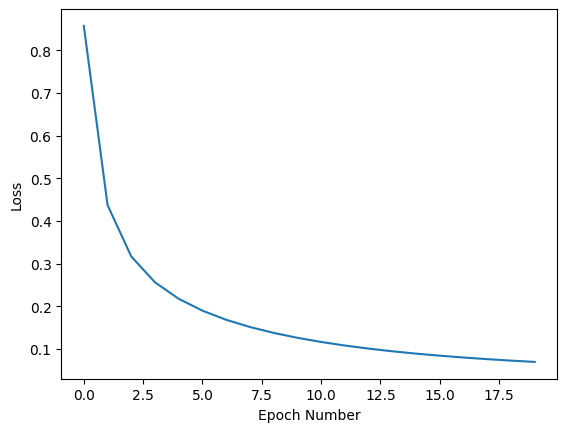

time: 326 ms (started: 2025-01-21 10:28:10 +00:00)


In [31]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

## Results

### Test your performance (20%)

In [32]:
X = X_test
Y = Y_test

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)
Z3 = np.matmul(W3, A2) + b3
A3 = sigmoid(Z3)
Z4 = np.matmul(W4, A3) + b4
A4 = sigmoid(Z4)


predictions = np.zeros((1,Y.shape[0]))
labels = np.zeros((1,Y.shape[0]))

for i in range(Y.shape[0]):
  if (A4[0,i] > 0.5):
    predictions[0,i] = 1
  labels[0,i] = Y[i,0]


print(confusion_matrix(predictions.T, labels.T))

[[ 90   1]
 [  1 108]]
time: 30.7 ms (started: 2025-01-21 10:28:10 +00:00)


### Visualize the results

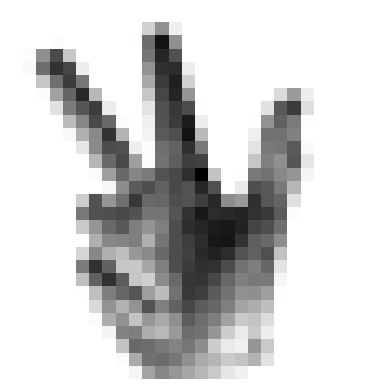

Real= 0 Predicted= [[0.00766128]]


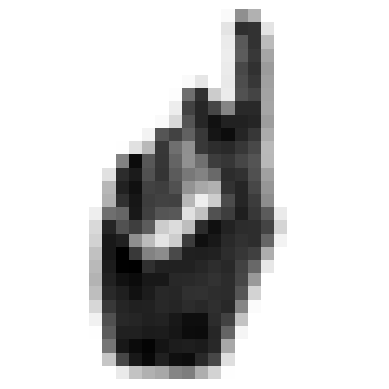

Real= 1 Predicted= [[0.96107877]]


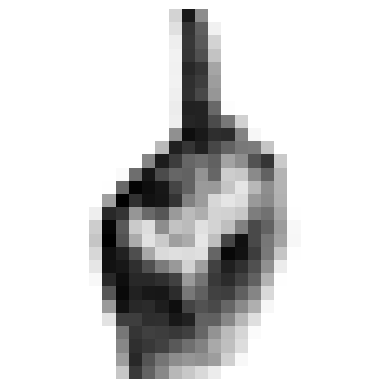

Real= 1 Predicted= [[0.93782163]]


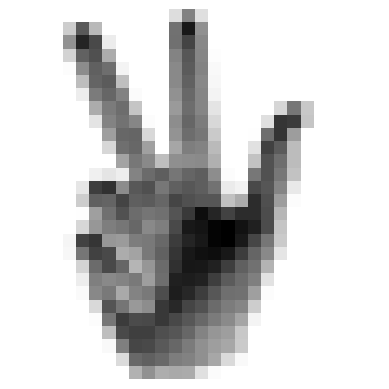

Real= 0 Predicted= [[0.00423842]]


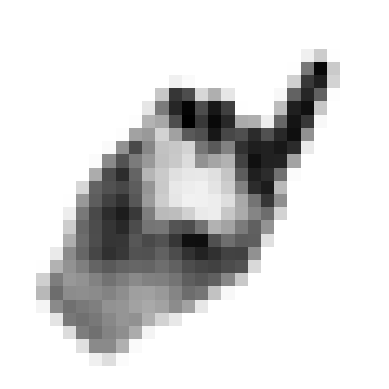

Real= 1 Predicted= [[0.99843769]]


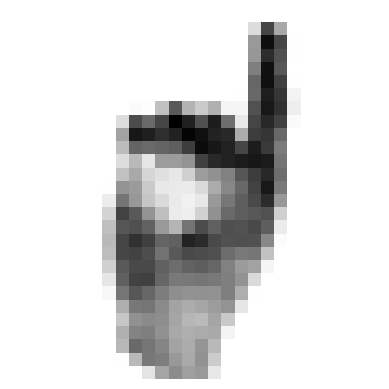

Real= 1 Predicted= [[0.99324202]]


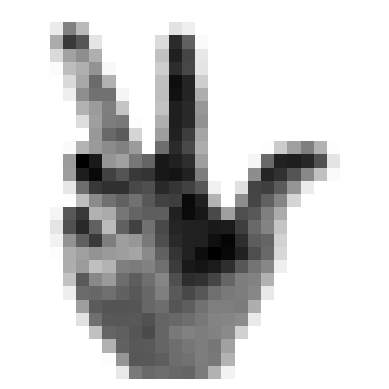

Real= 0 Predicted= [[0.01092786]]


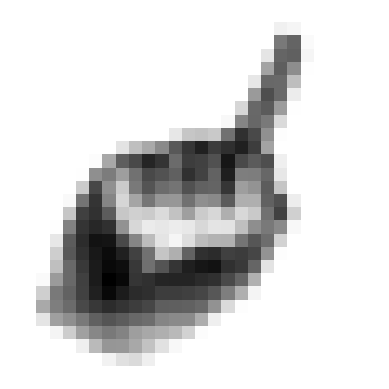

Real= 1 Predicted= [[0.90853399]]


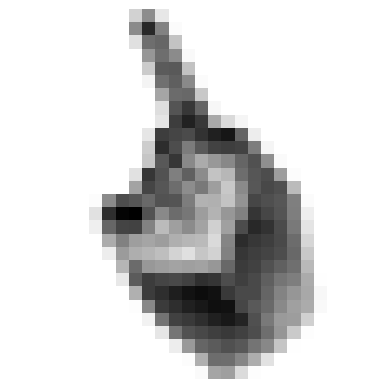

Real= 1 Predicted= [[0.91652144]]


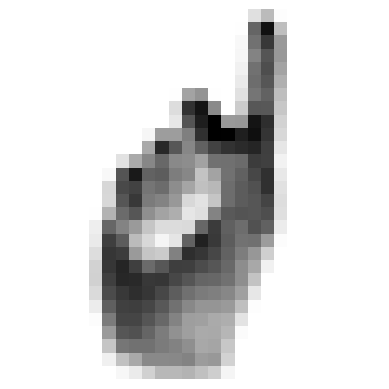

Real= 1 Predicted= [[0.99731244]]
time: 1.16 s (started: 2025-01-21 10:28:10 +00:00)


In [33]:
%matplotlib inline
from numpy import random
for example in range(10):
  i = random.randint(200)
  plt.imshow(X_test[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
  plt.axis("off")
  plt.show()
  Y_test[i,0]

  Z1 = (np.matmul(W1,X_test[:,i])).reshape(-1,1) + b1
  A1 = sigmoid(Z1)
  Z2 = np.matmul(W2, A1) + b2
  A2 = sigmoid(Z2)
  Z3 = np.matmul(W3, A2) + b3
  A3 = sigmoid(Z3)
  Z4 = np.matmul(W4, A3) + b4
  A4 = sigmoid(Z4)
  Yout = Y[i,0]
  print("Real=", Y_test[i,0], "Predicted=",A4)